In [76]:
from math import sqrt
import numpy as np
import unicodedata
import random
import string
from fractions import Fraction
from collections import Counter
import matplotlib.pyplot as plt

# Tarea 1: Exponenciación rápida

### a)

In [6]:
def e(a,b):
    if b==0:
        return 1
    if b>0 and b%2==0:
        return e(a*a,b/2)
    if b>0 and b%2==1:
        return e(a*a,(b-1)/2)*a

In [7]:
print(e(2,3),e(0,0))

8 1


### b)

In [8]:
def e(a,b):
    if b==0:
        return 1
    if b%2==0:
        return e(a*a,b/2)
    if b>0 and b%2==1:
        return e(a*a,(b-1)/2)*a
    if b<0 and b%2==1:
        return Fraction(1,e(a,-b))

In [9]:
print(e(-3,-2),e(2,-2),e(-3,-1))

1/9 1/4 -1/3


### c)

In [10]:
def euclid(a,b):
    a0, a1 = a, b
    s0, s1 = 1, 0
    t0, t1 = 0, 1
    
    while a1 != 0:
        q = a0//a1
        a0, a1 = a1, a0%a1
        s0, s1 = s1, s0-s1*q
        t0, t1 = t1, t0-t1*q
    return a0, s0, t0

In [11]:
def e(a,b,n):
    if b==0:
        return 1
    if b>0 and b%2==0:
        return e(a*a%n,b/2,n)
    if b>0 and b%2==1:
        return e(a*a%n,(b-1)/2,n)*a%n
    if b<0:
        d, u, v = euclid(a,n)
        if d == 1:
            return e(u,-b,n)
        else:
            print('no existe el inverso de ' + str(a) + ' mod '+ str(n))
            

In [12]:
e(-3,-2,6)
e(-16,3,21)

no existe el inverso de -3 mod 6


20

# Tarea 2: Criptosistema de Vigenère

In [13]:
def normalize(c):
    return unicodedata.normalize("NFD",c)[0]

def encode(cadena):
    cadena=cadena.upper().replace('Ñ','GN')
    cadena=''.join(normalize(c) for c in cadena if c.isalnum())
    return cadena

In [14]:
class Vigenere:
    
    def __init__(self,alphabet,key=None,keyLen=None):
        self.A=alphabet
        self.n=len(alphabet)
        
        # Diccionarios con los valores correspondientes a cada caracter
        self.value=dict(zip(self.A,range(self.n)))
        self.character={v:k for k,v in self.value.items()}
        
        # Si no se proporciona una clave se proporciona una aleatoria
        if key==None:
            if keyLen==None:
                keyLen=10
            self.key=''.join(random.choice(self.A) for _ in range(keyLen))
        else:
            self.key=key
            
    # Obtener el valor de una letra 
    def getValue(self,c):
        return self.value[c]
    
    # Obtener un letra a partir del valor 
    def getCharacter(self,v):
        return self.character[v]
        
    # Repite la clave hasta longitud length
    def keyToLength(self, length):
        return (self.key * (int(length/len(self.key))+1))[:length]
            
    # Función de cifrado
    def cipher(self,msg):
        k=self.keyToLength(len(msg))
        
        # Cambiamos las letras por su valor correspondiente
        msg_values=list(map(self.getValue,msg))
        key_values=list(map(self.getValue,k))
        
        # Sumamos módulo la longitud del diccionario
        result=[(msg_values[i]+key_values[i])%self.n for i in range(len(msg))]
        
        # Volvemos a convertir en caracteres y devolvemos el mensaje cifrado
        return ''.join((map(self.getCharacter,result)))
        
    # Función de descifrado
    def decipher(self, msg):
        k=self.keyToLength(len(msg))
        
        # Cambiamos las letras por su valor correspondiente
        msg_values=list(map(self.getValue,msg))
        key_values=list(map(self.getValue,k))
        
        # Restamos módulo la longitud del diccionario
        result=[(msg_values[i]-key_values[i])%self.n for i in range(len(msg))]
        
        # Volvemos a convertir en caracteres y devolvemos el mensaje descifrado
        return ''.join((map(self.getCharacter,result)))

In [15]:
alphabet=string.ascii_uppercase+string.digits

In [16]:
#vig = Vigenere(alphabet,'CLAVEMUYSECRETA')
vig = Vigenere(alphabet)

In [17]:
msg=encode('el secreto se protege a sí mismo. Mi constraseña del WI-FI es 123456')
msg

'ELSECRETOSEPROTEGEASIMISMOMICONSTRASEGNADELWIFIES123456'

In [18]:
cifrado=vig.cipher(msg)
cifrado

'S2JPJUKWWCS6IZ0HMHICW393TRSLK819K2HVKJVURVC7PIOH0LGKVGD'

In [19]:
vig.decipher(cifrado)

'ELSECRETOSEPROTEGEASIMISMOMICONSTRASEGNADELWIFIES123456'

# Tareas 3 y 4: Rompiendo el criptosistema de Vigenère

Vamos a poner un ejemplo del ataque al criptosistema de Vigenère usando el texto del ejercicio 4.
El ataque se basa en la obtención de la clave por el siguiente procedimiento:
- Primero se averigua su longitud, TODO
Nos aprovechamos de que la clave se repite hasta ocupar la longitud del texto a cifrar
https://github.com/ichantzaras/creamcrackerz

In [20]:
text="""UECWKDVLOTTVACKTPVGEZQMDAMRNPDDUXLBUICAMRHOECBHSPQLVIWO
FFEAILPNTESMLDRUURIFAEQTTPXADWIAWLACCRPBHSRZIVQWOFROGTT
NNXEVIVIBPDTTGAHVIACLAYKGJIEQHGECMESNNOCTHSGGNVWTQHKBPR
HMVUOYWLIAFIRIGDBOEBQLIGWARQHNLOISQKEPEIDVXXNETPAXNZGDX
WWEYQCTIGONNGJVHSQGEATHSYGSDVVOAQCXLHSPQMDMETRTMDUXTEQQ
JMFAEEAAIMEZREGIMUECICBXRVQRSMENNWTXTNSRNBPZHMRVRDYNECG
SPMEAVTENXKEQKCTTHSPCMQQHSQGTXMFPBGLWQZRBOEIZHQHGRTOBSG
TATTZRNFOSMLEDWESIWDRNAPBFOFHEGIXLFVOGUZLNUSRCRAZGZRTTA
YFEHKHMCQNTZLENPUCKBAYCICUBNRPCXIWEYCSIMFPRUTPLXSYCBGCC
UYCQJMWIEKGTUBRHVATTLEKVACBXQHGPDZEANNTJZTDRNSDTFEVPDXK
TMVNAIQMUQNOHKKOAQMTBKOFSUTUXPRTMXBXNPCLRCEAEOIAWGGVVUS
GIOEWLIQFOZKSPVMEBLOHLXDVCYSMGOPJEFCXMRUIGDXNCCRPMLCEWT
PZMOQQSAWLPHPTDAWEYJOGQSOAVERCTNQQEAVTUGKLJAXMRTGTIEAFW
PTZYIPKESMEAFCGJILSBPLDABNFVRJUXNGQSWIUIGWAAMLDRNNPDXGN
PTTGLUHUOBMXSPQNDKBDBTEECLECGRDPTYBVRDATQHKQJMKEFROCLXN
FKNSCWANNAHXTRGKCJTTRRUEMQZEAEIPAWEYPAJBBLHUEHMVUNFRPVM
EDWEKMHRREOGZBDBROGCGANIUYIBNZQVXTGORUUCUTNBOEIZHEFWNBI
GOZGTGWXNRHERBHPHGSIWXNPQMJVBCNEIDVVOAGLPONAPWYPXKEFKOC
MQTRTIDZBNQKCPLTTNOBXMGLNRRDNNNQKDPLTLNSUTAXMNPTXMGEZKA
EIKAGQ"""
text=encode(text)

#### Encontramos la longitud de la clave con el método de Kasiski.

Primero encontramos las sequencias de caracteres que se repiten en el texto

In [21]:
# Encuentra secuencias de caracteres que se repiten dos o más veces, así como las posiciones en las que aparecen
def repeated_seq_pos(text, seq_len):
    seq_pos = {}  # Guardaremos en un diccionario todas las secuencias y las posiciones en las que aparecen
    for i, char in enumerate(text): # Recorremos el texto
        next_seq = text[i:i+seq_len] # Tomamos cada posible secuencia de seq_len caracteres
        if next_seq in seq_pos.keys(): # Si la secuencia ya había ocurrido, añadimos la nueva posición
            seq_pos[next_seq].append(i)
        else: # Si no había ocurrido, añadimos su primera ocurrencia
            seq_pos[next_seq] = [i]
    repeated = list(filter(lambda x: len(seq_pos[x]) >= 2, seq_pos)) # Nos quedamos con las secuencias que tienen 2 o más ocurrencias
    rep_seq_pos = [(seq, seq_pos[seq]) for seq in repeated]
    return rep_seq_pos

In [22]:
secuencias=repeated_seq_pos(text,3)
secuencias[:4]

[('UEC', [0, 292]),
 ('VAC', [11, 518]),
 ('GEZ', [18, 1040]),
 ('QMD', [21, 259])]

Ahora calculamos las diferencias (el espacio) entre las posiciones de las ocurrencias.
Si una secuencia se repite, es probable que lo haga tras un múltiplo de la longitud de la clave.

In [23]:
# Devuelve una lista con las diferencias entre las posiciones de las ocurrencias
def get_spacings(positions):
    return [positions[i+1] - positions[i] for i in range(len(positions)-1)]

In [24]:
seq_espacios = {}
for seq, positions in secuencias:
    seq_espacios[seq] = get_spacings(positions)
[(k,v) for k,v in seq_espacios.items()][:4]

[('UEC', [292]), ('VAC', [507]), ('GEZ', [1022]), ('QMD', [238])]

Ahora hallamos los divisores propios de esas diferencias.

In [25]:
# Calcula los factores del número number
def get_factors(number):
    factors = set()
    for i in range(1, int(sqrt(number))+1):
        if number % i == 0:
            factors.add(i)
            factors.add(number//i)
    return sorted(factors)

In [26]:
# Sacamos la lista de factores de las diferencias entre las posiciones de las occurencias
factor_lists = []
for espacios in seq_espacios.values():
    for espacio in espacios:
        factor_lists.append(get_factors(number=espacio))
factor_lists[:4]

[[1, 2, 4, 73, 146, 292],
 [1, 3, 13, 39, 169, 507],
 [1, 2, 7, 14, 73, 146, 511, 1022],
 [1, 2, 7, 14, 17, 34, 119, 238]]

Los candidatos a ser la longitud de clave dividiran a la mayoría de los espacios entre ocurrencias de cada secuencia

In [27]:
def candidate_key_lengths(factor_lists, max_key_len):
    # Unimos todos los factores en una lista
    all_factors = [factor_lists[lst][fac] for lst in range(len(factor_lists)) for fac in range(len(factor_lists[lst]))]
    # Excluimos los mayores que la longitud máxima de clave
    candidate_lengths = list(filter(lambda x:  x <= max_key_len, all_factors))
    # Los ordenamos según el número de veces que aparecen
    sorted_candidates = sorted(set(candidate_lengths), key=lambda x: all_factors.count(x), reverse=True)
    return sorted_candidates

In [28]:
ckl = candidate_key_lengths(factor_lists=factor_lists, max_key_len=20)
ckl

[1, 7, 3, 2, 14, 5, 4, 9, 6, 13, 15, 8, 17, 10, 11, 12, 16, 19, 20, 18]

Obviamente el 1 es el factor que más se repite, el 7 es nuestro principal candidato a ser la longitud de la clave. Confirmaremos nuestra sospecha usando el test de Friedman.

#### Confirmamos la longitud de la clave por el test de Friedman.

In [29]:
# Divide el texto en trozos de longitud size
def get_blocks(text, size):
    blocks = [text[i:i+size] for i in range(0, len(text)-size, size)]
    return blocks

In [30]:
# Crea size strings uniendo las letras cuya posición se diferencia en un múltiplo de size
def get_columns(text_blocks):
    group_size = len(text_blocks[0])
    columns = []
    for letter_count in range(group_size):
        column = ''
        for group_count in range(len(text_blocks)):
            column += text_blocks[group_count][letter_count]
        columns.append(column)
    return columns

In [31]:
# Calcula el índice de coincidencia
def IndCo(s):
    n = len(s)
    F = Counter(list(s))
    return sum([F[c]*(F[c]-1) for c in string.ascii_uppercase])/(n*(n-1))

In [92]:
# Calculamos del índice IndCo para la longitud de clave 7
frac = []
EN = 0.0685
ES = 0.0755

for keyLen in range(3,20):
    blocks=get_blocks(text,keyLen)
    columns=get_columns(blocks)
    indco = []
    for i in range(keyLen):
        indco.append(IndCo(columns[i]))
    
    # Este cociente se acerca a 1 cuando la frecuencia de las letras es similar a la del idioma
    # y se dispara cuando la frecuencia es similar a la que obtendríamos eligiendo letras al azar.
    frac.append((ES-1/26)/(sum(indco)/len(indco)-1/26))

In [93]:
def graf_barras(data):
    fig, ax = plt.subplots()
    ax.bar(range(3,20), data, color='lime')
    ax.set_title('Comparación de distintas longitudes de clave')
    ax.set_xlabel('Longitud de clave')

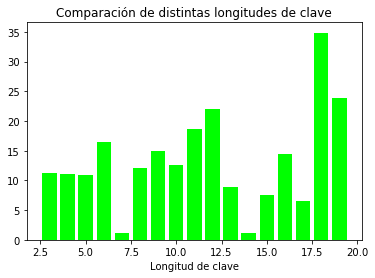

In [94]:
graf_barras(frac)

Los candidatos más probables para la longitud de clave con el test Friedman son 7 y 13. Como el 7 es un valor que se repite en ambos test, probaremos con este valor.

#### Hallamos la clave

In [34]:
# Dividimos el texto en bloques de longitud 7.
keyLen=7
blocks=get_blocks(text,keyLen)
columns=get_columns(blocks)

In [35]:
EN_REL_FREQ = {'A': 0.08167, 'B': 0.01492, 'C': 0.02782, 'D': 0.04253, 'E': 0.12702, 'F': 0.02228, 'G': 0.02015,
               'H': 0.06094, 'I': 0.06966, 'J': 0.00153, 'K': 0.00772, 'L': 0.04025, 'M': 0.02406, 'N': 0.06749,
               'O': 0.07507, 'P': 0.01929, 'Q': 0.00095, 'R': 0.05987, 'S': 0.06327, 'T': 0.09056, 'U': 0.02758,
               'V': 0.00978, 'W': 0.02360, 'X': 0.00150, 'Y': 0.01974, 'Z': 0.00074}

In [36]:
# Desplaza una cadena sumandole la misma cantidad a cada caracter
def shift(text, amount):
    shifted = ''
    letters = string.ascii_uppercase
    for letter in text:
        shifted += letters[(letters.index(letter)+amount) % len(letters)]
    return shifted

In [37]:
# Calcula el índice de coincidencia mutuo
def MIC(s):
    n = len(s)
    F = Counter(list(s))
    return sum([EN_REL_FREQ[c]*F[c] for c in string.ascii_uppercase])/n

In [38]:
# Metemos en un diccionario los MIC de cada columna con cada shifted
mutIndCo={}
for i in range(keyLen):
    for sigma in range(26):
        mutIndCo[(i,sigma)]=MIC(shift(columns[i],sigma))
mutIndCo

{(0, 0): 0.0338986,
 (0, 1): 0.03622446666666667,
 (0, 2): 0.04238366666666666,
 (0, 3): 0.03611046666666667,
 (0, 4): 0.03895613333333332,
 (0, 5): 0.032792133333333334,
 (0, 6): 0.031918600000000005,
 (0, 7): 0.033161333333333334,
 (0, 8): 0.040211266666666655,
 (0, 9): 0.041177666666666675,
 (0, 10): 0.036285399999999995,
 (0, 11): 0.0393304,
 (0, 12): 0.0404108,
 (0, 13): 0.04324566666666667,
 (0, 14): 0.04009186666666668,
 (0, 15): 0.03573226666666667,
 (0, 16): 0.0377198,
 (0, 17): 0.04114573333333333,
 (0, 18): 0.03715886666666667,
 (0, 19): 0.031382933333333335,
 (0, 20): 0.0458984,
 (0, 21): 0.0308954,
 (0, 22): 0.03149420000000001,
 (0, 23): 0.04414006666666667,
 (0, 24): 0.06178473333333333,
 (0, 25): 0.03643913333333333,
 (1, 0): 0.0660501333333333,
 (1, 1): 0.036821799999999995,
 (1, 2): 0.035615266666666666,
 (1, 3): 0.039210600000000005,
 (1, 4): 0.041167,
 (1, 5): 0.034436400000000006,
 (1, 6): 0.034625800000000005,
 (1, 7): 0.035881666666666666,
 (1, 8): 0.030162,
 (1,

In [39]:
# Calculamos el shift con mayor MIC de cada columna
sigma=[]
for i in range(keyLen):
    maximo = mutIndCo[(i,0)]
    sigmax = 0
    for s in range(1,26):
        if mutIndCo[(i,s)] > maximo:
            maximo = mutIndCo[(i,s)]
            sigmax = s
    sigma.append((-sigmax)%26)
sigma

[2, 0, 15, 8, 19, 0, 13]

In [40]:
vig = Vigenere(string.ascii_uppercase)

In [41]:
key = ''.join(list(map(vig.getCharacter, sigma)))

In [42]:
vig.key = key
print(vig.key, vig.decipher(text))

CAPITAN SENORDIJOELCAPITANNEMOMOSTRANDOMELOSINSTRUMENTOSCOLGADOSDELASPAREDESDESUCAMAROTEHEAQUILOSAPARATOSEXIGIDOSPORLANAVEGACIONDELNAUTILUSALIGUALQUEENELSALONLOSTENGOAQUIBAJOMISOJOSINDICANDOMEMISITUACIONYMIDIRECCIONEXACTASENMEDIODELOCEANOALGUNOSDEELLOSLESONCONOCIDOSCOMOELTERMOMETROQUEMARCALATEMPERATURAINTERIORDELNAUTILUSELBAROMETROQUEPESAELAIREYPREDICELOSCAMBIOSDETIEMPOELHIGROMETROQUEREGISTRAELGRADODESEQUEDADDELAATMOSFERAELSTORMGLASSCUYAMEZCLAALDESCOMPONERSEANUNCIALAINMINENCIADELASTEMPESTADESLABRUJULAQUEDIRIGEMIRUTAELSEXTANTEQUEPORLAALTURADELSOLMEINDICAMILATITUDLOSCRONOMETROSQUEMEPERMITENCALCULARMILONGITUDYPORULTIMOMISANTEOJOSDEDIAYDENOCHEQUEMESIRVENPARAESCRUTARTODOSLOSPUNTOSDELHORIZONTECUANDOELNAUTILUSEMERGEALASUPERFICIEDELASAGUASSONLOSINSTRUMENTOSHABITUALESDELNAVEGANTEYSUUSOMEESCONOCIDOREPUSEPEROHAYOTROSAQUIQUERESPONDENSINDUDAALASPARTICULARESEXIGENCIASDELNAUTILUSESECUADRANTEQUEVEORECORRIDOPORUNAAGUJAINMOVILNOESUNMANOMETROESUNMANOMETROENEFECTOPUESTOENCOMUNICACIONCONELAGUACUYAPRESIONEX

In [43]:
keyLen=7

In [44]:
def get_blocks(text, size):
    blocks = [text[i:i+size] for i in range(0, len(text)-size, size)]
    return blocks

In [45]:
blocks=get_blocks(text,keyLen)
print(blocks)

['UECWKDV', 'LOTTVAC', 'KTPVGEZ', 'QMDAMRN', 'PDDUXLB', 'UICAMRH', 'OECBHSP', 'QLVIWOF', 'FEAILPN', 'TESMLDR', 'UURIFAE', 'QTTPXAD', 'WIAWLAC', 'CRPBHSR', 'ZIVQWOF', 'ROGTTNN', 'XEVIVIB', 'PDTTGAH', 'VIACLAY', 'KGJIEQH', 'GECMESN', 'NOCTHSG', 'GNVWTQH', 'KBPRHMV', 'UOYWLIA', 'FIRIGDB', 'OEBQLIG', 'WARQHNL', 'OISQKEP', 'EIDVXXN', 'ETPAXNZ', 'GDXWWEY', 'QCTIGON', 'NGJVHSQ', 'GEATHSY', 'GSDVVOA', 'QCXLHSP', 'QMDMETR', 'TMDUXTE', 'QQJMFAE', 'EAAIMEZ', 'REGIMUE', 'CICBXRV', 'QRSMENN', 'WTXTNSR', 'NBPZHMR', 'VRDYNEC', 'GSPMEAV', 'TENXKEQ', 'KCTTHSP', 'CMQQHSQ', 'GTXMFPB', 'GLWQZRB', 'OEIZHQH', 'GRTOBSG', 'TATTZRN', 'FOSMLED', 'WESIWDR', 'NAPBFOF', 'HEGIXLF', 'VOGUZLN', 'USRCRAZ', 'GZRTTAY', 'FEHKHMC', 'QNTZLEN', 'PUCKBAY', 'CICUBNR', 'PCXIWEY', 'CSIMFPR', 'UTPLXSY', 'CBGCCUY', 'CQJMWIE', 'KGTUBRH', 'VATTLEK', 'VACBXQH', 'GPDZEAN', 'NTJZTDR', 'NSDTFEV', 'PDXKTMV', 'NAIQMUQ', 'NOHKKOA', 'QMTBKOF', 'SUTUXPR', 'TMXBXNP', 'CLRCEAE', 'OIAWGGV', 'VUSGIOE', 'WLIQFOZ', 'KSPVMEB', 'LOHLXDV', 'CYSMGOP'

Agrupamos ahora por columnas, cada columna contiene las letras a las que se le suma la misma letra de la clave

In [46]:
def get_columns(text_blocks):
    group_size = len(text_blocks[0])
    columns = []
    for letter_count in range(group_size):
        column = ''
        for group_count in range(len(text_blocks)):
            column += text_blocks[group_count][letter_count]
        columns.append(column)
    return columns

In [47]:
columns=get_columns(blocks)
columns

['ULKQPUOQFTUQWCZRXPVKGNGKUFOWOEEGQNGGQQTQERCQWNVGTKCGGOGTFWNHVUGFQPCPCUCCKVVGNNPNNQSTCOVWKLCJUCWQPJVQKTWKCPVQWNPUQTGVKRKNKUEPUFWERIQUOWGHGQEGWKTKORKSPK',
 'EOTMDIELEEUTIRIOEDIGEONBOIEAIITDCGESCMMQAEIRTBRSECMTLERAOEAEOSZENUICSTBQGAAPTSDAOMUMLIULSOYEIRTSTOEELGPEGLRSANTONERRQONACEIAEREOOUVUENTESMILYOICBRDUTA',
 'CTPDDCCVASRTAPVGVTAJCCVPYRBRSDPXTJADXDDJAGCSXPDPNTQXWITTSSPGGRRHTCCXIPGJTTCDJDXIHTTXRASIPHSFGPPADGRAJTTSJDJWAPTBDEDDJCSHJMPJHPKGGYXCIBGRIJDPPCDPXDPTXE',
 'WTVAUABIIMIPWBQTITCIMTWRWIQQQVAWIVTVLMUMIIBMTZYMXTQMQZOTMIBIUCTKZKUIMLCMUTBZZTKQKBUBCWGQVLMCDMZWAQCVAIZMIAUIMDGMKCPAMLCXTQABMVMZCITUZIWBWVVOXMZLMNLAMI',
 'KVGMXMHWLLFXLHWTVGLEEHTHLGLHKXXWGHHVHEXFMMXENHNEKHHFZHBZLWFXZRTHLBBWFXCWBLXETFTMKKXXEGIFMXGXXLMLWSTTXEYELBXULXLXBLTTKXWTTZWBVMHBGBGTHGXHXBVNKQBTGNTXGK',
 'DAERLRSOPDAAASONIAAQSSQMIDINEXNEOSSOSTTAEURNSMEAESSPRQSREDOLLAAMEANEPSUIREQADEMUOOPNAGOOEDOMNCOPEONUMAIASNNIDGUSDEYQENARREELUERDANONEONPNCOAETNTLNLMEA',
 'VCZNBHPFNREDCRFNBHYHNGHVABGLPNZYNQYAPREEZEVNRRCVQPQBBHGNDRFFNZYCNYRY

In [48]:
# Desplaza una cadena sumandole la misma cantidad a cada caracter
def shift(text, amount):
    shifted = ''
    letters = string.ascii_uppercase
    for letter in text:
        shifted += letters[(letters.index(letter)+amount) % len(letters)]
    return shifted

In [49]:
def corr(a,b):
    s=0
    for letter in string.ascii_uppercase:
        s+=a.count(letter)*b.count(letter)
    return s/(len(a)*len(b))

In [50]:
mutIndCo={}
for i in range(keyLen):
    for j in range(i+1,keyLen):
        for sigma in range(26):
            mutIndCo[(i,j,sigma)]=corr(columns[i],shift(columns[j],sigma))

In [51]:
mutIndCo

{(0, 1, 0): 0.035111111111111114,
 (0, 1, 1): 0.03693333333333333,
 (0, 1, 2): 0.06848888888888889,
 (0, 1, 3): 0.038622222222222224,
 (0, 1, 4): 0.03546666666666667,
 (0, 1, 5): 0.03475555555555555,
 (0, 1, 6): 0.04391111111111111,
 (0, 1, 7): 0.030355555555555556,
 (0, 1, 8): 0.037333333333333336,
 (0, 1, 9): 0.036444444444444446,
 (0, 1, 10): 0.03542222222222222,
 (0, 1, 11): 0.03746666666666667,
 (0, 1, 12): 0.04351111111111111,
 (0, 1, 13): 0.03986666666666667,
 (0, 1, 14): 0.04008888888888889,
 (0, 1, 15): 0.03528888888888889,
 (0, 1, 16): 0.042977777777777774,
 (0, 1, 17): 0.03902222222222222,
 (0, 1, 18): 0.04195555555555556,
 (0, 1, 19): 0.03244444444444444,
 (0, 1, 20): 0.03591111111111111,
 (0, 1, 21): 0.028844444444444443,
 (0, 1, 22): 0.04208888888888889,
 (0, 1, 23): 0.029955555555555555,
 (0, 1, 24): 0.045733333333333334,
 (0, 1, 25): 0.032,
 (0, 2, 0): 0.03617777777777778,
 (0, 2, 1): 0.04448888888888889,
 (0, 2, 2): 0.037866666666666667,
 (0, 2, 3): 0.03875555555555556

In [52]:
mutIndCo_altos=list(filter(lambda x: mutIndCo[x] >= 0.065, mutIndCo))
mutIndCo_altos

[(0, 1, 2),
 (0, 2, 13),
 (0, 3, 20),
 (0, 4, 9),
 (0, 5, 2),
 (0, 6, 15),
 (1, 2, 11),
 (1, 3, 18),
 (1, 4, 7),
 (1, 5, 0),
 (1, 6, 13),
 (2, 3, 7),
 (2, 4, 22),
 (2, 5, 15),
 (2, 6, 2),
 (3, 4, 15),
 (3, 5, 8),
 (3, 6, 21),
 (4, 5, 19),
 (4, 6, 6),
 (5, 6, 13)]

In [53]:
possible_keys=[]
for first in string.ascii_uppercase:
    key=first
    for i in mutIndCo_altos[:keyLen-1]:
        key+=shift(first,i[2])
    possible_keys.append(key)
possible_keys

['ACNUJCP',
 'BDOVKDQ',
 'CEPWLER',
 'DFQXMFS',
 'EGRYNGT',
 'FHSZOHU',
 'GITAPIV',
 'HJUBQJW',
 'IKVCRKX',
 'JLWDSLY',
 'KMXETMZ',
 'LNYFUNA',
 'MOZGVOB',
 'NPAHWPC',
 'OQBIXQD',
 'PRCJYRE',
 'QSDKZSF',
 'RTELATG',
 'SUFMBUH',
 'TVGNCVI',
 'UWHODWJ',
 'VXIPEXK',
 'WYJQFYL',
 'XZKRGZM',
 'YALSHAN',
 'ZBMTIBO']

In [54]:
for key in possible_keys:
    vig=Vigenere(string.ascii_uppercase,key)
    print(key,vig.decipher(text[:50]))

ACNUJCP UCPCBBGLMGZMYNKRCBXCKQKQGDPYPBQAOJMUGPGDPSOCPHYQAQ
BDOVKDQ TBOBAAFKLFYLXMJQBAWBJPJPFCOXOAPZNILTFOFCORNBOGXPZP
CEPWLER SANAZZEJKEXKWLIPAZVAIOIOEBNWNZOYMHKSENEBNQMANFWOYO
DFQXMFS RZMZYYDIJDWJVKHOZYUZHNHNDAMVMYNXLGJRDMDAMPLZMEVNXN
EGRYNGT QYLYXXCHICVIUJGNYXTYGMGMCZLULXMWKFIQCLCZLOKYLDUMWM
FHSZOHU PXKXWWBGHBUHTIFMXWSXFLFLBYKTKWLVJEHPBKBYKNJXKCTLVL
GITAPIV OWJWVVAFGATGSHELWVRWEKEKAXJSJVKUIDGOAJAXJMIWJBSKUK
HJUBQJW NVIVUUZEFZSFRGDKVUQVDJDJZWIRIUJTHCFNZIZWILHVIARJTJ
IKVCRKX MUHUTTYDEYREQFCJUTPUCICIYVHQHTISGBEMYHYVHKGUHZQISI
JLWDSLY LTGTSSXCDXQDPEBITSOTBHBHXUGPGSHRFADLXGXUGJFTGYPHRH
KMXETMZ KSFSRRWBCWPCODAHSRNSAGAGWTFOFRGQEZCKWFWTFIESFXOGQG
LNYFUNA JRERQQVABVOBNCZGRQMRZFZFVSENEQFPDYBJVEVSEHDREWNFPF
MOZGVOB IQDQPPUZAUNAMBYFQPLQYEYEURDMDPEOCXAIUDURDGCQDVMEOE
NPAHWPC HPCPOOTYZTMZLAXEPOKPXDXDTQCLCODNBWZHTCTQCFBPCULDND
OQBIXQD GOBONNSXYSLYKZWDONJOWCWCSPBKBNCMAVYGSBSPBEAOBTKCMC
PRCJYRE FNANMMRWXRKXJYVCNMINVBVBROAJAMBLZUXFRAROADZNASJBLB
QSDKZSF EMZMLLQVWQJWIXUBMLHMUAUAQNZIZLAKYTWEQZQNZCYMZRIA